In [1]:
import pandas as pd
import numpy as np


In [2]:
# Import the Dataset 
file_path = 'Power_outage_dataset.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset imported successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
    exit()


Dataset imported successfully!


In [3]:
df.columns

Index(['Event Description', 'Year', 'Date Event Began', 'Time Event Began',
       'Date of Restoration', 'Time of Restoration', 'Respondent',
       'Geographic Areas', 'NERC Region', 'Demand Loss (MW)',
       'Number of Customers Affected', 'Tags'],
      dtype='object')

In [4]:
print("\nInitial Dataset Info")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head(30))

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print("\nStandardized columns:")
print(df.columns)
try:
    # Combine Date and Time Columns and Convert to Datetime
    df['start_datetime'] = pd.to_datetime(
        df['date_event_began'] + ' ' + df['time_event_began'],
        errors='coerce'
    )

    df['end_datetime'] = pd.to_datetime(
        df['date_of_restoration'] + ' ' + df['time_of_restoration'],
        errors='coerce'
    )

    # Drop the original separate columns
    df = df.drop(columns=[
        'date_event_began',
        'time_event_began',
        'date_of_restoration',
        'time_of_restoration'
    ])

    print("\nDates combined and converted to datetime objects.")
    print(df[['start_datetime', 'end_datetime']].head())

except KeyError as e:
    print(f"Error: One of the expected date/time columns was not found: {e}")
    print("Please check the column names in your CSV file and adjust the code.")
    exit()

except Exception as e:
    print(f"An unexpected error occurred during datetime conversion: {e}")
    exit()


df = df[df['end_datetime'] > df['start_datetime']].copy()

df['outage_duration_minutes'] = (df['end_datetime'] - df['start_datetime']).dt.total_seconds() / 60
print("\n'outage_duration_minutes' column created.")
print(df['outage_duration_minutes'].describe())

# Handle Missing Values 
df['number_of_customers_affected'] = df['number_of_customers_affected'].fillna(0)
print("\nFilled missing values in 'number_of_customers_affected' with 0.")

# Save the Cleaned Dataset
df.to_csv('cleaned_power_outage_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_power_outage_data.csv'.")
print("\n--- Preprocessing Complete ---")
print(f"Final dataset shape: {df.shape}")


Initial Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Event Description             1652 non-null   object
 1   Year                          1652 non-null   int64 
 2   Date Event Began              1652 non-null   object
 3   Time Event Began              1643 non-null   object
 4   Date of Restoration           1638 non-null   object
 5   Time of Restoration           1632 non-null   object
 6   Respondent                    1652 non-null   object
 7   Geographic Areas              1651 non-null   object
 8   NERC Region                   1650 non-null   object
 9   Demand Loss (MW)              1246 non-null   object
 10  Number of Customers Affected  1434 non-null   object
 11  Tags                          1651 non-null   object
dtypes: int64(1), object(11)
memory usage: 155.0+ KB
None



C:\Users\Suhma S\AppData\Local\Temp\ipykernel_11072\1045046232.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_datetime'] = pd.to_datetime(
C:\Users\Suhma S\AppData\Local\Temp\ipykernel_11072\1045046232.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_datetime'] = pd.to_datetime(



'outage_duration_minutes' column created.
count      1504.000000
mean       2917.733378
std        7559.770575
min           1.000000
25%         159.000000
50%         840.000000
75%        3120.000000
max      188978.000000
Name: outage_duration_minutes, dtype: float64

Filled missing values in 'number_of_customers_affected' with 0.

Cleaned data saved to 'cleaned_power_outage_data.csv'.

--- Preprocessing Complete ---
Final dataset shape: (1504, 11)


In [5]:
data = pd.read_csv('cleaned_power_outage_data.csv')
data.columns

Index(['event_description', 'year', 'respondent', 'geographic_areas',
       'nerc_region', 'demand_loss_mw', 'number_of_customers_affected', 'tags',
       'start_datetime', 'end_datetime', 'outage_duration_minutes'],
      dtype='object')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('cleaned_power_outage_data.csv', parse_dates=['start_datetime','end_datetime'])
print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   event_description             1504 non-null   object        
 1   year                          1504 non-null   int64         
 2   respondent                    1504 non-null   object        
 3   geographic_areas              1504 non-null   object        
 4   nerc_region                   1502 non-null   object        
 5   demand_loss_mw                1134 non-null   object        
 6   number_of_customers_affected  1504 non-null   object        
 7   tags                          1503 non-null   object        
 8   start_datetime                1504 non-null   datetime64[ns]
 9   end_datetime                  1504 non-null   datetime64[ns]
 10  outage_duration_minutes       1504 non-null   float64       
dtypes: datetime64[ns](2), float64(

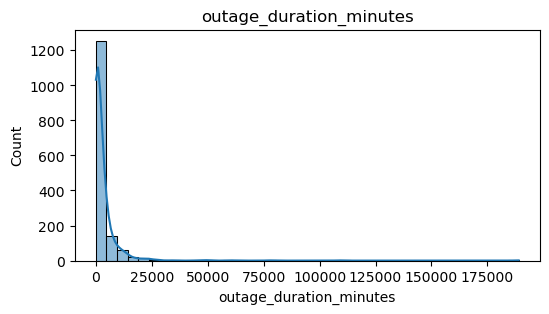

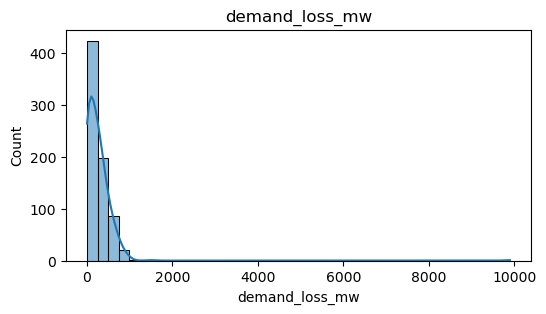

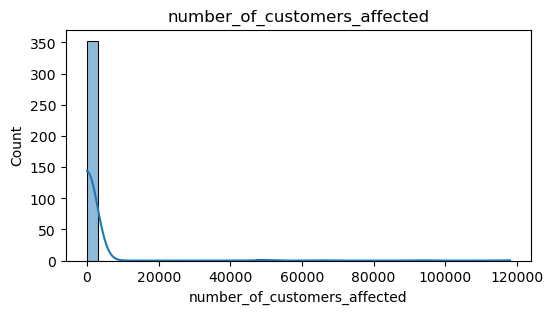

respondent 497


respondent
ISO New England                         46
Southern Company                        42
Puerto Rico Electric Power Authority    40
PacifiCorp                              40
American Electric Power                 38
Delmarva Power & Light Company          28
Consumers Energy                        26
Pacific Gas and Electric                24
CenterPoint Energy                      23
Tennessee Valley Authority              21
Name: count, dtype: int64

geographic_areas 941


geographic_areas
Island of Puerto Rico              28
California                         21
Texas                              20
Northern California                20
Southeastern Michigan              13
Southern California                12
Tacoma, Washington                 11
Northern and Central California    10
Northern Illinois                  10
Georgia                            10
Name: count, dtype: int64

nerc_region 20


nerc_region
RFC     382
WECC    354
SERC    253
NPCC    139
SPP      64
TRE      58
MRO      49
PR       45
FRCC     43
ECAR     34
Name: count, dtype: int64

tags 88


tags
severe weather, thunderstorm                214
vandalism, physical                         172
severe weather                              154
severe weather, winter storm                149
severe weather, hurricane/tropical storm    102
vandalism                                    84
severe weather, wind                         76
load shedding                                75
public appeal                                64
severe weather, storm                        53
Name: count, dtype: int64

In [7]:
#Univariate analysis Numeric distributions
num_cols = ['outage_duration_minutes','demand_loss_mw','number_of_customers_affected']
df['demand_loss_mw'] = pd.to_numeric(df['demand_loss_mw'], errors='coerce')
df['number_of_customers_affected'] = pd.to_numeric(df['number_of_customers_affected'], errors='coerce')

for c in ['outage_duration_minutes','demand_loss_mw','number_of_customers_affected']:
    if c in df.columns:
        plt.figure(figsize=(6,3))
        sns.histplot(df[c].dropna(), bins=40, kde=True)
        plt.title(c)
        plt.show()

cat_cols = ['respondent','geographic_areas','nerc_region','tags']
for c in cat_cols:
    if c in df.columns:
        print(c, df[c].nunique())
        display(df[c].value_counts().head(10))

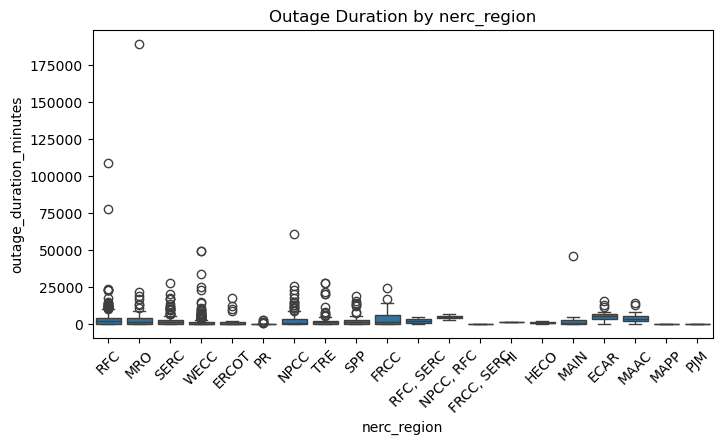

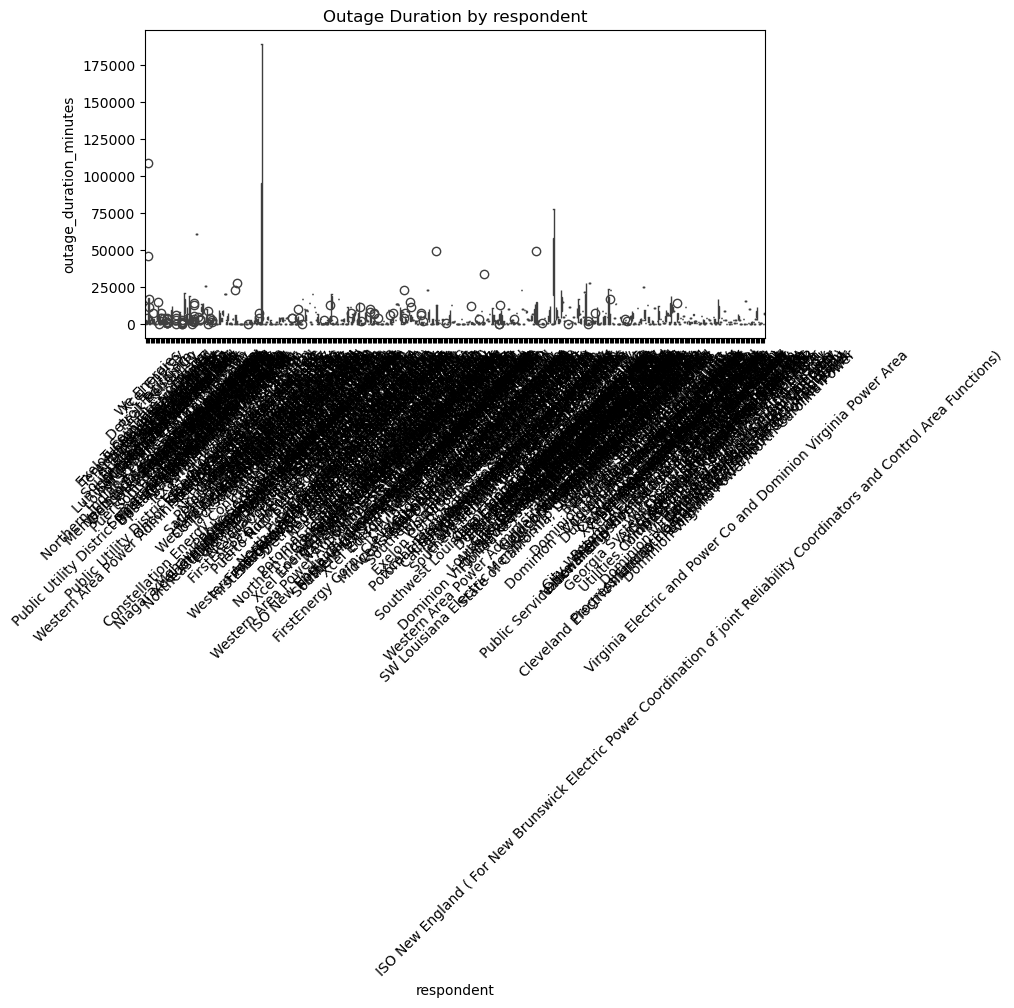

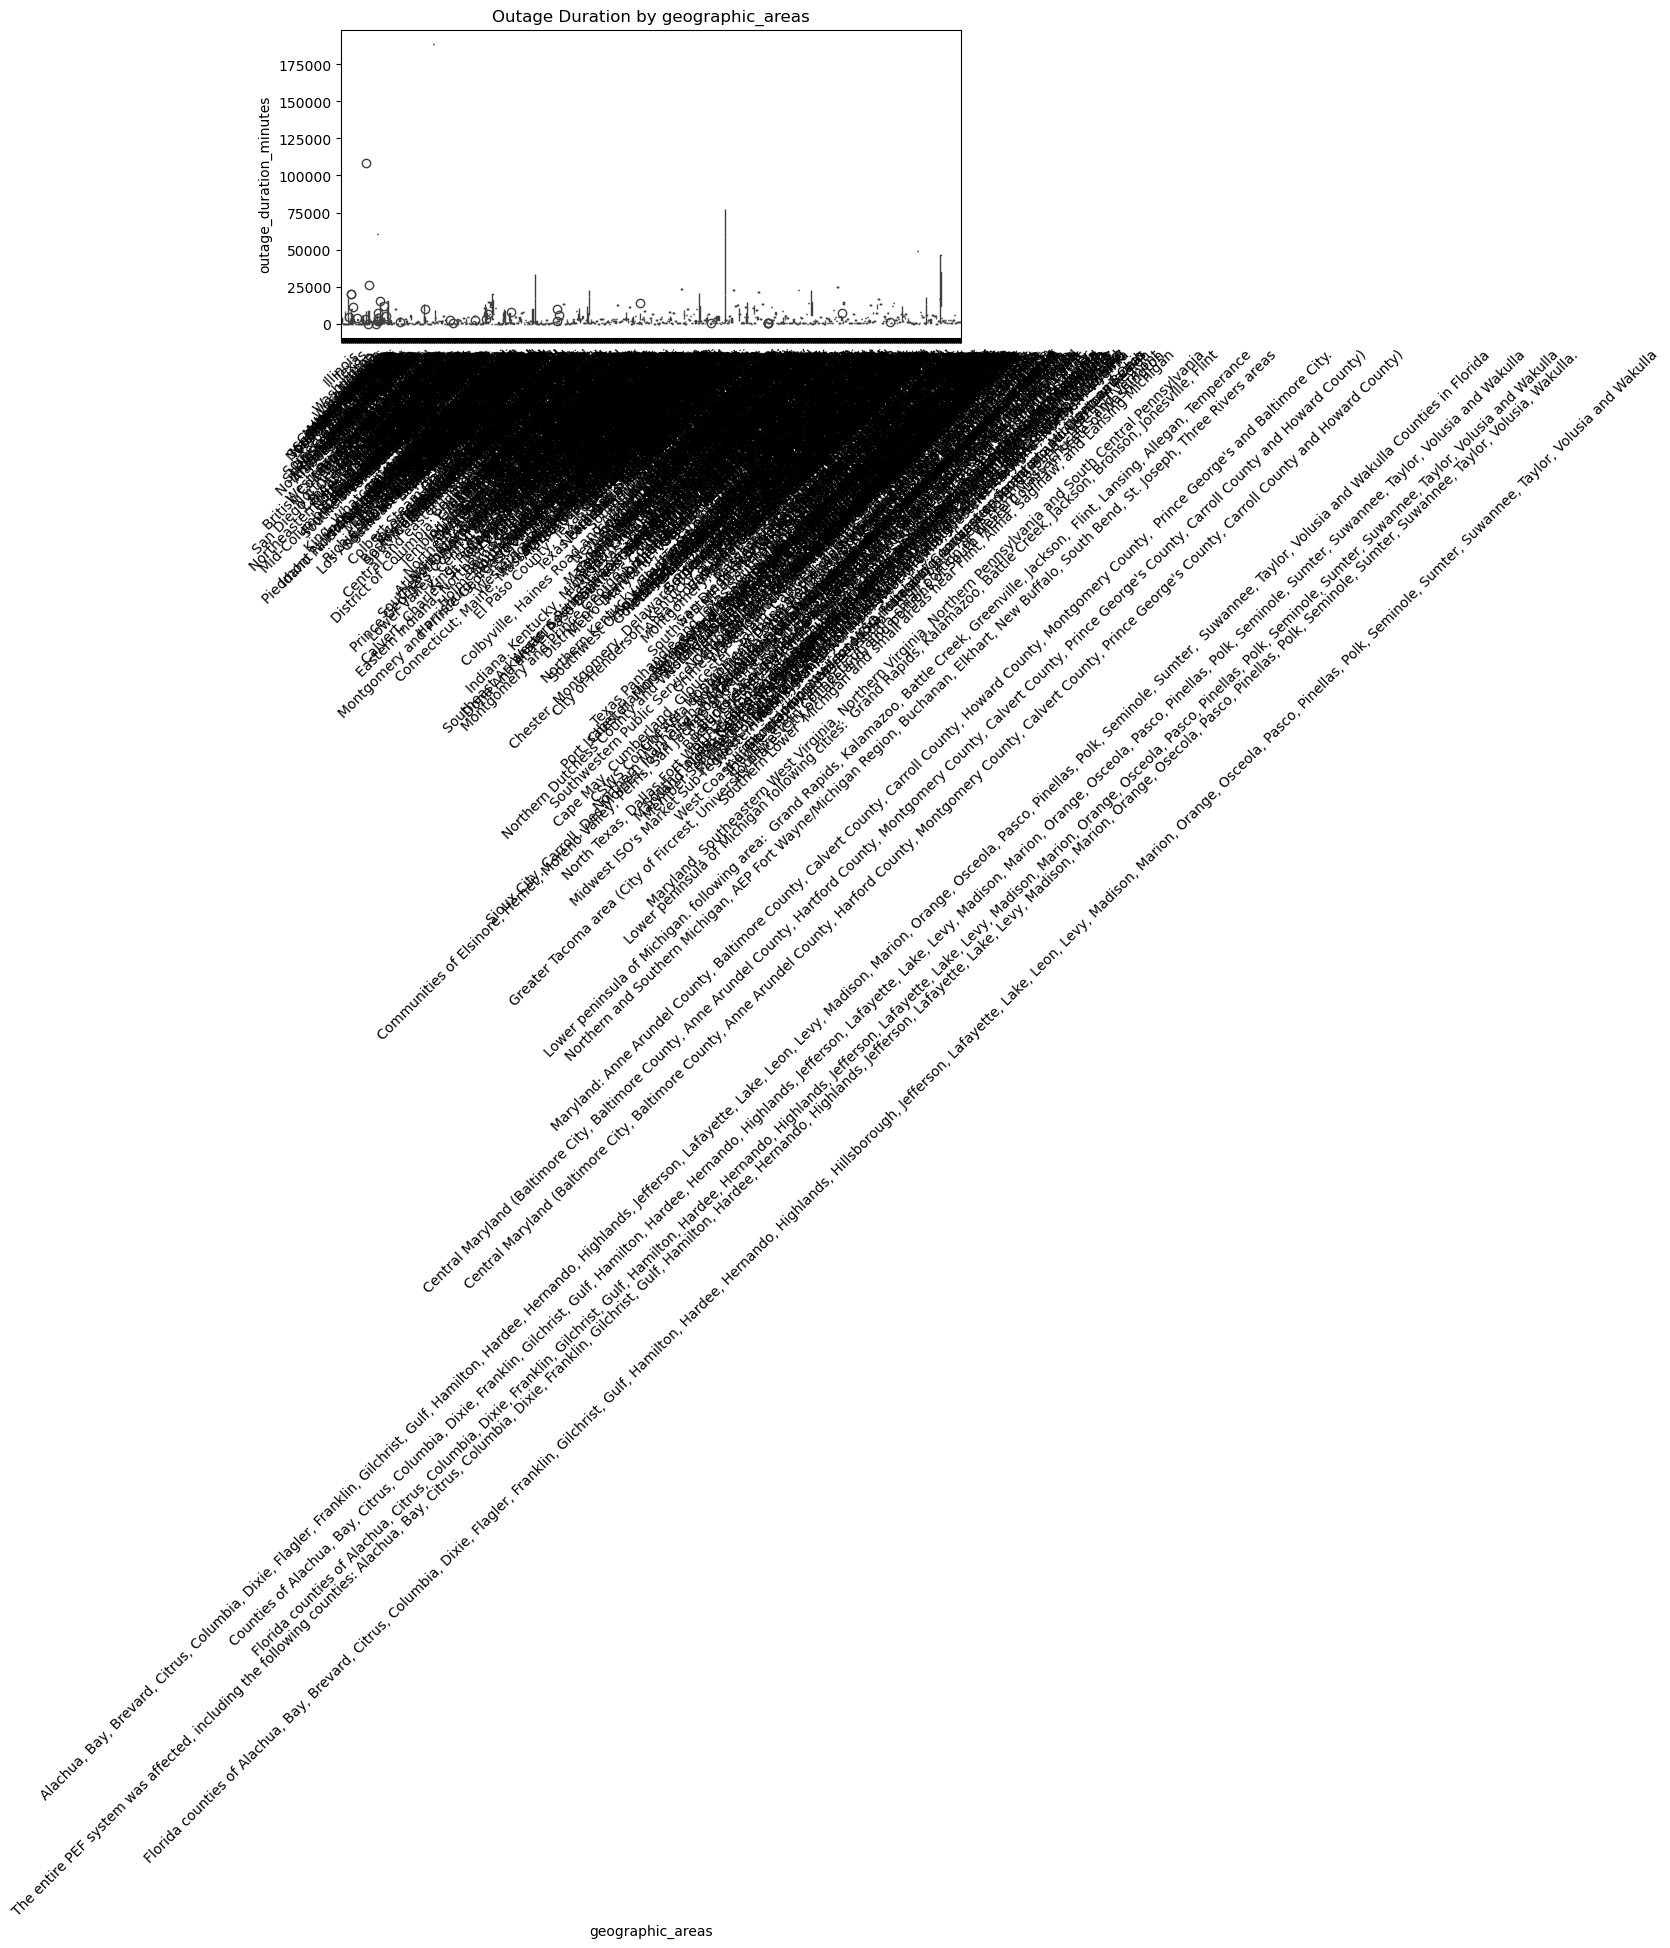

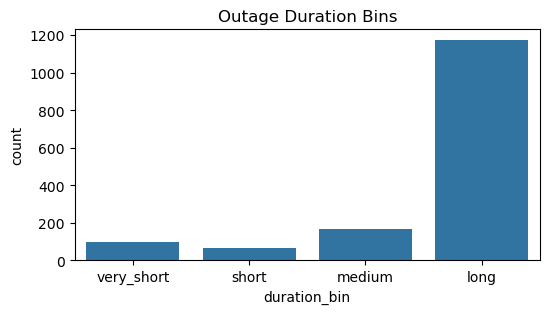

In [8]:
# Bivariate analysis
# Outage duration by categorical variable 
for c in ['nerc_region','respondent','geographic_areas']:
    if c in df.columns:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=c, y='outage_duration_minutes', data=df)
        plt.xticks(rotation=45)
        plt.title(f'Outage Duration by {c}')
        plt.show()

df['duration_bin'] = pd.cut(df['outage_duration_minutes'],
                           bins=[-1,5,30,120,1e9],
                           labels=['very_short','short','medium','long'])
plt.figure(figsize=(6,3))
sns.countplot(x='duration_bin', data=df, order=['very_short','short','medium','long'])
plt.title('Outage Duration Bins')
plt.show()

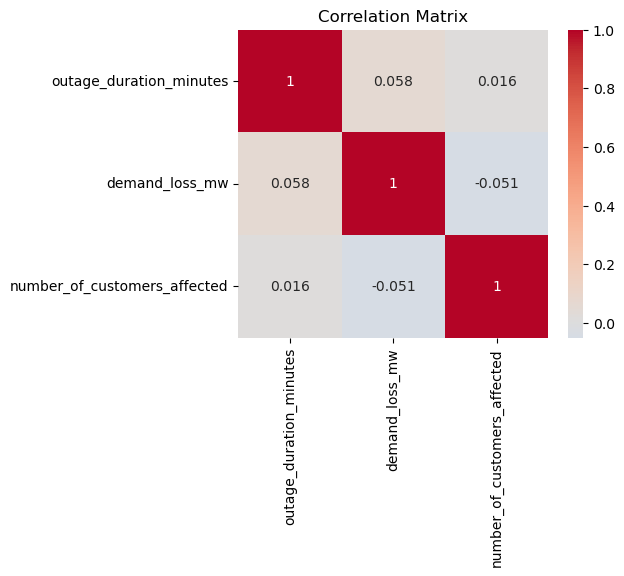

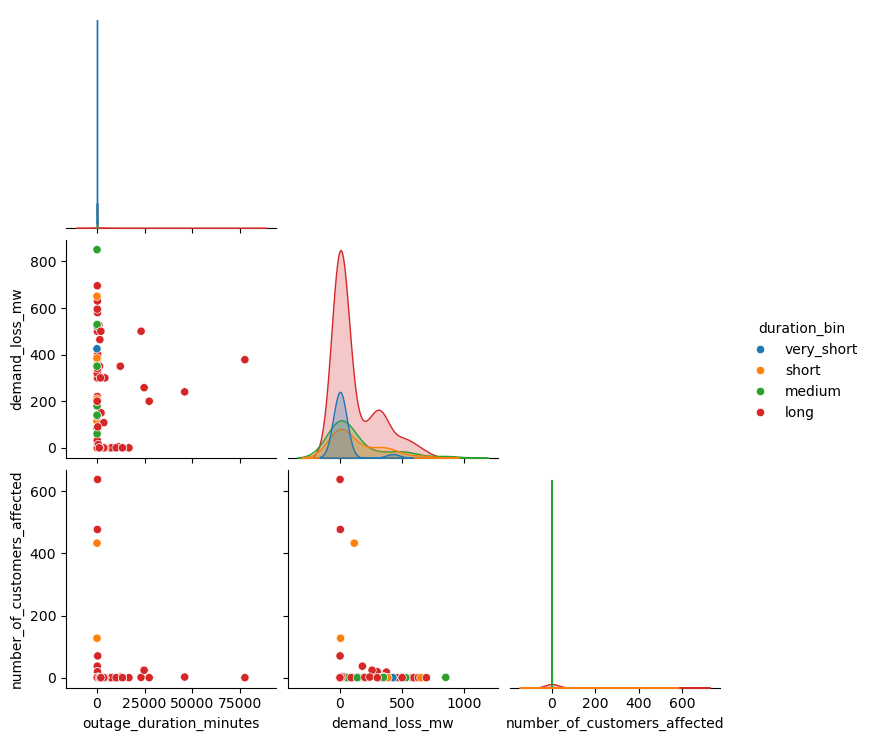

In [9]:
#Correlation & pairplot
num_for_corr = ['outage_duration_minutes','demand_loss_mw','number_of_customers_affected']
num_for_corr = [c for c in num_for_corr if c in df.columns]
plt.figure(figsize=(5,4))
sns.heatmap(df[num_for_corr].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Pairplot

sns.pairplot(df[num_for_corr + ['duration_bin']].dropna(), hue='duration_bin', corner=True)
plt.show()

In [10]:
#Time-based features
df['start_hour'] = df['start_datetime'].dt.hour
df['start_weekday'] = df['start_datetime'].dt.weekday
df['is_weekend'] = df['start_weekday'].isin([5,6]).astype(int)
df['start_month'] = df['start_datetime'].dt.month

# Text / boolean features
df['event_desc_len'] = df['event_description'].fillna('').str.len()
df['has_tags'] = df['tags'].notna().astype(int)

In [11]:
# Target and candidate features
df['target_long'] = (df['outage_duration_minutes'] > 60).astype(int)

# Candidate features
numeric_features = [
    'demand_loss_mw','number_of_customers_affected','event_desc_len',
    'start_hour','start_weekday','start_month','is_weekend'
]
numeric_features = [c for c in numeric_features if c in df.columns]

categorical_features = [c for c in ['respondent','geographic_areas','nerc_region'] if c in df.columns]

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

Numeric: ['demand_loss_mw', 'number_of_customers_affected', 'event_desc_len', 'start_hour', 'start_weekday', 'start_month', 'is_weekend']
Categorical: ['respondent', 'geographic_areas', 'nerc_region']


In [12]:
#Preprocessing
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preproc = ColumnTransformer([
    ('num', num_pipe, numeric_features),
    ('cat', cat_pipe, categorical_features)],
    remainder='drop')

In [13]:
#Train/test split
df = df.dropna(subset=['target_long'])
X = df[numeric_features + categorical_features]
y = df['target_long']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape, X_val.shape, y_train.value_counts(normalize=True))

(1203, 10) (301, 10) target_long
1    0.839568
0    0.160432
Name: proportion, dtype: float64


In [14]:
#Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

K = 10

pipe_select = Pipeline([
    ('preproc', preproc),                       # ColumnTransformer from Step 8
    ('select', SelectKBest(score_func=f_classif, k=K))
])

pipe_select.fit(X_train, y_train)

num_feat_names = numeric_features
if categorical_features:
    ohe = pipe_select.named_steps['preproc'].named_transformers_['cat'].named_steps['onehot']
    cat_imputer = pipe_select.named_steps['preproc'].named_transformers_['cat'].named_steps['imputer']
    cat_names = []
    for i, col in enumerate(categorical_features):
        cats = ohe.categories_[i]
        cat_names += [f"{col}__{str(c)}" for c in cats]
else:
    cat_names = []

all_feat_names = num_feat_names + cat_names

selected_idx = pipe_select.named_steps['select'].get_support(indices=True)
selected_features = [all_feat_names[i] for i in selected_idx]

print("Selected top features (K={}):".format(K))
for i, f in enumerate(selected_features, 1):
    print(f"{i}. {f}")

Selected top features (K=10):
1. respondent__Delmarva Power & Light Company
2. respondent__PacifiCorp
3. respondent__Potomac Electric Power Company (PEPCO)
4. respondent__Puerto Rico Electric Power Authority
5. geographic_areas__Island of Puerto Rico
6. geographic_areas__Newark, Delaware
7. geographic_areas__Salt Lake City, Utah
8. geographic_areas__Vermont
9. nerc_region__PR
10. nerc_region__WECC


In [15]:
# Final Model Training and Evaluation  

# Split data into features and target  
X = df[numeric_features + categorical_features]  
y = df['target_long']  

# Split into train and test sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  

# Final Model Pipeline with Feature Selection  
final_model = Pipeline([  
    ('preproc', preproc),  # Our preprocessing pipeline  
    ('select', SelectKBest(score_func=f_classif, k=K)),  # Feature selection  
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))  
])  

# Train the model  
print("\nTraining the model...")  
final_model.fit(X_train, y_train)  

# Make predictions  
y_pred = final_model.predict(X_test)  
y_pred_proba = final_model.predict_proba(X_test)[:, 1] 


Training the model...



Model Evaluation:
Accuracy: 0.78
Precision: 0.92
Recall: 0.81
F1 Score: 0.86
ROC AUC: 0.75


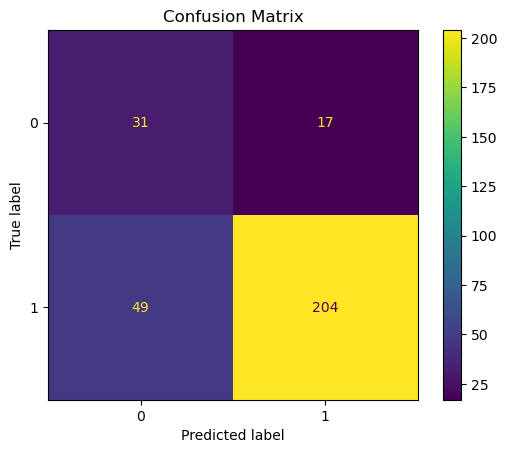


Top 5 Features:
- demand_loss_mw: 0.236
- respondent_AES Greenidge, LLC: 0.206
- start_hour: 0.109
- start_weekday: 0.098
- event_desc_len: 0.090


In [16]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# key metrics
print("\nModel Evaluation:")
print("="*40)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

if hasattr(final_model.named_steps['classifier'], 'feature_importances_'):
    importances = final_model.named_steps['classifier'].feature_importances_
    feature_names = numeric_features + list(
        final_model.named_steps['preproc']
        .named_transformers_['cat']
        .named_steps['onehot']
        .get_feature_names_out(categorical_features)
    )
    
    top_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)[:5]
    print("\nTop 5 Features:")
    for feat, imp in top_features:
        print(f"- {feat}: {imp:.3f}")

In [17]:
#sample new outage record
new_data = pd.DataFrame({
    'demand_loss_mw': [150.5],                   # Numeric: MW of demand lost
    'number_of_customers_affected': [5000],      # Numeric: Customers affected
    'event_desc_len': [120],                     # Numeric: Description length
    'start_hour': [14],                          # Numeric: Hour of day (2 PM)
    'start_weekday': [2],                        # Numeric: Tuesday (0=Mon, 6=Sun)
    'start_month': [7],                          # Numeric: July
    'is_weekend': [0],                           # Binary: Not weekend
    'respondent': ['Utility Company A'],         # Categorical: Utility provider
    'geographic_areas': ['Northeast'],           # Categorical: Region
    'nerc_region': ['RFC']                       # Categorical: NERC region
})

# prediction
prediction = final_model.predict(new_data)
prediction_proba = final_model.predict_proba(new_data)

print("\nPrediction Results:")
print("="*40)
print(f"Will this be a long outage (>60 min)? {'YES' if prediction[0] else 'NO'}")
print(f"Probability of long outage: {prediction_proba[0][1]:.2%}")
print(f"Probability of short outage: {prediction_proba[0][0]:.2%}")


Prediction Results:
Will this be a long outage (>60 min)? YES
Probability of long outage: 67.63%
Probability of short outage: 32.37%
